In [2]:
!pip install pandas matplotlib seaborn
import pandas as pd
import os

dataset_path = "dataset"

Defaulting to user installation because normal site-packages is not writeable


### Arquivos presentes no Dataset

In [3]:
for item in os.listdir(dataset_path):
    print(item)

graphhierarchicalclasses.csv
datasetdummyclasses.csv
annotatorclasses.csv


#### Analisando o conteúdo de cada arquivo

In [4]:
dataframes = [pd.read_csv(os.path.join(dataset_path, item)) for item in os.listdir(dataset_path)]

for pos, df in enumerate(dataframes):
    columns_str = ""
    for column in df.columns:
        columns_str += " " + column
    print(f"F{pos} -----------------------------++>")
    print(f"{len(df.columns)} Columns: {columns_str}")


F0 -----------------------------++>
2 Columns:  Source Target
F1 -----------------------------++>
80 Columns:  tweet_id Hate.speech Sexism Body Racism Ideology Homophobia Origin Religion Health OtherLifestyle Aborting.women Agnostic Argentines Asians Autists Black.Women Blond.women Brazilians.women Chinese Criminals Egyptians Fat.people Football.players.women Gamers Homeless Homeless.women Indigenous Iranians Japaneses Jews Jornalists Latins Left.wing.ideology Men.Feminists Mexicans Muslims.women Nordestines Old.people Polyamorous Poor.people Rural.people Russians Sertanejos Street.artist Ucranians Vegetarians White.people Young.people Old.women Ugly.people Venezuelans Angolans Black.people Disabled.people Fat.women Feminists Gays Immigrants Islamists Lesbians Men Muslims Refugees Trans.women Travestis Women Bissexuals Transexuals Ugly.women Thin.women Arabic East.europeans Africans South.Americans Brazilians Migrants Homossexuals Thin.people Ageing
F2 -----------------------------++>


## Descrevendo classificação baseada 

In [5]:
df_1 = dataframes[1]["Hate.speech"]
hate_speechs = df_1.value_counts().to_list()

print(hate_speechs)

[4440, 1228]


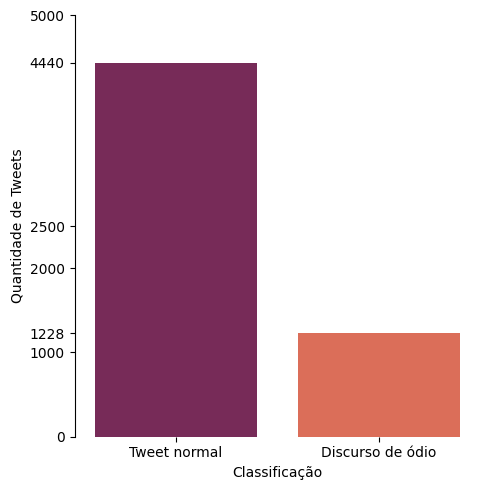

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig = plt.figure(figsize = (5, 5))

# Set up the matplotlib figure
ax = sns.barplot(x=["Tweet normal", "Discurso de ódio"], y=hate_speechs, palette="rocket")

# Labels
ax.set(xlabel="Classificação", ylabel="Quantidade de Tweets")
# fig.set_ylabel("Quantidade de Tweets")
# fig.set_xlabel("Classificação")


# Finalize the plot
sns.despine(bottom=True)
plt.setp(fig.axes, yticks=[0,1000,1228,2000,2500,4440, 5000])
plt.tight_layout(h_pad=2)
plt.show()


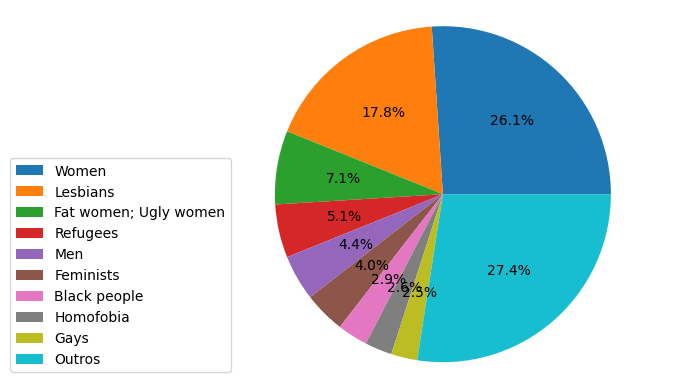

In [83]:
# Dados
occurrences = dataframes[2]["class"].value_counts().to_dict()
labels = list(occurrences.keys())
values = list(occurrences.values())

min_value = 30

# Listas de rótulos
new_labels, new_values, other_values = [],[],0

for i, value in enumerate(values):
    if value < min_value:
        other_values += value
    else:
        new_labels.append(labels[i])
        new_values.append(value)

if other_values > 0:
    new_labels.append("Outros")
    new_values.append(other_values)

# Gráfico Pizza
plt.pie(new_values, autopct='%.1f%%')
plt.legend(new_labels, loc="lower center", bbox_to_anchor=(-0.15,0))
plt.axis('equal')
plt.show()